In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

## 10-1-3 단층 퍼셉트론

In [2]:
# 초기에는 입력값에 따른 가중치들, 편향의 합을 구하고 이후 계단함수를 통해 출력값 냈다.
# 하지만 은닉층이 없는 간단한 단층퍼센트론은 XOR 문제를 풀 수 없었다
# XOR과 같은 문제를 해결하기 위해 은닉층을 추가했고 은닉층이 1개 이상있는 것을 Multilayer Perceptron(MLP)이라고 한다.

In [3]:
# 단층 퍼셉트론은 학습률(0.1)에 따라 가중치를 업데이트하는 SGDClassifier와 같다.(규제도 없음)
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
iris = load_iris()
X = iris['data'][:,2:4]
y = (iris['target'] == 0).astype(np.int)

sgd = SGDClassifier(loss = 'perceptron',penalty=None,eta0=0.1,learning_rate='constant')
per_clf = Perceptron()
per_clf.fit(X,y)
sgd.fit(X,y)

y_pred_per = per_clf.predict([[2,0.5]])
y_pred_sgd = sgd.predict([[2,0.5]])

# 아무리 확률적으로 뽑아온다고 해도 값이 너무 다르잖아?
print(y_pred_per)
print(y_pred_sgd)

[0]
[1]


# 케라스로 분류용 다층 퍼셉트론 만들기

In [4]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
# 시퀀스 모델을 만드는 것으로 가장 간단한 케라스 신경망 모델이다. 순서대로 연결된 층을 일렬로 쌓아서 구성한다.
model = keras.models.Sequential()

# 첫 번째 층을 만든다. Flatten은 입력 이미지를 1차원으로 변환한다. 즉, 데이터를 받으면 X.reshape(-1,1) 을 계산해준다.
# 또한, 첫 번째 층이기 때문에 input_shape도 지정해야한다. 
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# 뉴런 300개를 가진 Dense 은닉층을 추가한다. Dense 층마다 각자 가중치 행렬을 관리한다. 
# 이 행렬에는 층의 뉴런과 입력 사이의 모든 연결 가중치가 포함된다.
# 은닉층 각각의 노드들의 출력층이 300개, 100개, 10개이다. 마지막이 10개인 이유는 class_names의 결과값이 10개이기 때문이다.
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [11]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


# 이렇게 할 수 도 있다.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.layers

In [14]:
model.layers[0]

In [15]:
# 위와 같이 모델을 생성한 이후 compile 매서드를 이용해 사용할 손실 함수와 옵티마이저를 지정해야한다.
# 비용함수
# > 목표 레이블이 정수로만 이루어져있고 클래스가 배타적이라면 sparse_categorical_crossentropy를 사용한다. ex) 0,1,2,3,4,5,6,7,8,9
# > 목표 레이블이 one hot encoding이라면 categorical_crossentropy를 사용한다. ex)0,0,0,0,0,1,0,0
# > 목표 레이블이 이진분류 라면, binaray_crossentropy 사용. 또한 이진분류이기 때문에 출력층에 softmax가 아닌 sigmoid가 들어간다.
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd',metrics = ['accuracy'])

In [22]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 49us/sample - loss: 0.3611 - accuracy: 0.8733 - val_loss: 0.3722 - val_accuracy: 0.8686
Epoch 2/30
55000/55000 [==============================] - 3s 50us/sample - loss: 0.3517 - accuracy: 0.8753 - val_loss: 0.3611 - val_accuracy: 0.8712
Epoch 3/30
55000/55000 [==============================] - 3s 49us/sample - loss: 0.3425 - accuracy: 0.8786 - val_loss: 0.3595 - val_accuracy: 0.8730
Epoch 4/30
55000/55000 [==============================] - 3s 48us/sample - loss: 0.3321 - accuracy: 0.8811 - val_loss: 0.3561 - val_accuracy: 0.8732
Epoch 5/30
55000/55000 [==============================] - 3s 48us/sample - loss: 0.3237 - accuracy: 0.8841 - val_loss: 0.3391 - val_accuracy: 0.8764
Epoch 6/30
55000/55000 [==============================] - 3s 48us/sample - loss: 0.3162 - accuracy: 0.8875 - val_loss: 0.3374 - val_accuracy: 0.8796
Epoch 7/30
55000/55000 [==============================] -

In [23]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 19us/sample - loss: 0.3297 - accuracy: 0.8828


[0.32973676719069483, 0.8828]

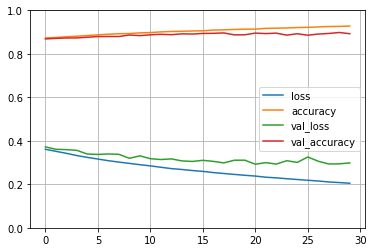

In [24]:
# sequential api를 이용해 만든 모델의 객체인 history는 수행된 에포크가 끝날 때마다 훈련 세트와 검증세크에 대한 손힐과 측정한 지표를 담은 딕셔너리 속성을 갖는다.
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.gca().set_ylim(0,1)
plt.grid(True)

In [25]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 19us/sample - loss: 0.3297 - accuracy: 0.8828


[0.32973676719069483, 0.8828]

In [26]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [27]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [28]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

# 케라스로 회귀용 다층 퍼셉트론 만들기 

In [70]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full,X_test,y_train_full,y_test = train_test_split(housing['data'],housing['target'])
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

model = tf.keras.Sequential([
    keras.layers.Dense(30,activation = 'relu',input_shape = X_train.shape[1:]), # 이 데이터는 이상치가 많기 때문에 과대적합을 막기 위해 은닉층을 한 개만 설정해줬다. 
    keras.layers.Dense(1) # 회귀는 마지막 활성화 함수가 없는 하나의 뉴런이다.
])

metrics=[keras.metrics.sparse_categorical_accuracy]
model.compile(loss='mean_squared_error',optimizer = 'sgd')


In [71]:

history = model.fit(X_train,y_train, epochs =20, validation_data=(X_valid,y_valid))
mse_test = model.evaluate(X_test,y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 37us/sample - loss: 1.0627 - val_loss: 0.5768
Epoch 2/20
11610/11610 [==============================] - 0s 23us/sample - loss: 0.4862 - val_loss: 0.4869
Epoch 3/20
11610/11610 [==============================] - 0s 23us/sample - loss: 0.4502 - val_loss: 0.4722
Epoch 4/20
11610/11610 [==============================] - 0s 23us/sample - loss: 0.4299 - val_loss: 0.4673
Epoch 5/20
11610/11610 [==============================] - 0s 23us/sample - loss: 0.4557 - val_loss: 0.4630
Epoch 6/20
11610/11610 [==============================] - 0s 23us/sample - loss: 0.4281 - val_loss: 0.4324
Epoch 7/20
11610/11610 [==============================] - 0s 23us/sample - loss: 0.4004 - val_loss: 0.4244
Epoch 8/20
11610/11610 [==============================] - 0s 23us/sample - loss: 0.3950 - val_loss: 0.4226
Epoch 9/20
11610/11610 [==============================] - 0s 23us/sample - loss: 0.3900 - val_l

array([[0.3597173],
       [2.3716075],
       [8.403187 ]], dtype=float32)

# 함수형 API를 이용해 복잡한 모델만들기

In [32]:
housing = fetch_california_housing()

X_train_full,X_test,y_train_full,y_test = train_test_split(housing['data'],housing['target'])
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [33]:
input_ = keras.layers.Input(shape=X_train.shape[1:]) # input 객체 만들기. 
hidden1 = keras.layers.Dense(30,activation = 'relu')(input_) # 30개의 뉴런과 ReLU 활성화 함수를 가진 Dense 층을 만든다. 입력과 함께 호출
hidden2 = keras.layers.Dense(30,activation = 'relu')(hidden1) # 윗 줄과 동일
concat = keras.layers.Concatenate()([input_,hidden2]) # 두 번째 층과 입력층을 연결하기
output = keras.layers.Dense(1)(concat) # 하나의 뉴런과 활성화 함수가 없는 출력층을 만들고 concat층과 연결
model = keras.Model(inputs = [input_],outputs = [output]) # 케라스 모델로 생성

In [34]:
input_A = keras.layers.Input(shape = [5],name = 'wide_input')
input_B = keras.layers.Input(shape = [6],name = 'deep_input')
hidden1 = keras.layers.Dense(30,activation='relu')(input_B)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name= 'output')(concat)
model = keras.Model(inputs = [input_A,input_B],outputs = [output])

In [35]:
model.compile(loss = "mse",optimizer = keras.optimizers.SGD(lr=1e-3))

In [36]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 41us/sample - loss: 1.9038 - val_loss: 0.8852
Epoch 2/20
11610/11610 [==============================] - 0s 25us/sample - loss: 0.8437 - val_loss: 0.6841
Epoch 3/20
11610/11610 [==============================] - 0s 25us/sample - loss: 0.7117 - val_loss: 0.6136
Epoch 4/20
11610/11610 [==============================] - 0s 25us/sample - loss: 0.6568 - val_loss: 0.5715
Epoch 5/20
11610/11610 [==============================] - 0s 25us/sample - loss: 0.6224 - val_loss: 0.5428
Epoch 6/20
11610/11610 [==============================] - 0s 25us/sample - loss: 0.5969 - val_loss: 0.5201
Epoch 7/20
11610/11610 [==============================] - 0s 25us/sample - loss: 0.5771 - val_loss: 0.5034
Epoch 8/20
11610/11610 [==============================] - 0s 25us/sample - loss: 0.5597 - val_loss: 0.4892
Epoch 9/20
11610/11610 [==============================] - 0s 25us/sample - loss: 0.5456 - val_l

# 서브클래싱 API로 동적 모델 만들기

In [38]:
class DeepModel(keras.Model):
    def __init__(self, units = 30, activation = 'relu',**kargs):
        super().__init__(**kargs)
        self.hidden1 = keras.layers.Dense(units,activation=activation)
        self.hidden2 = keras.layers.Dense(units,activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self,inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = DeepModel(30, activation="relu")

In [39]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 55us/sample - loss: 2.6470 - output_1_loss: 2.4159 - output_2_loss: 4.7161 - val_loss: 1.2124 - val_output_1_loss: 0.9614 - val_output_2_loss: 3.4689
Epoch 2/10
11610/11610 [==============================] - 0s 28us/sample - loss: 1.0998 - output_1_loss: 0.8938 - output_2_loss: 2.9535 - val_loss: 0.8963 - val_output_1_loss: 0.7459 - val_output_2_loss: 2.2475
Epoch 3/10
11610/11610 [==============================] - 0s 28us/sample - loss: 0.8885 - output_1_loss: 0.7551 - output_2_loss: 2.0894 - val_loss: 0.7692 - val_output_1_loss: 0.6602 - val_output_2_loss: 1.7486
Epoch 4/10
11610/11610 [==============================] - 0s 29us/sample - loss: 0.7975 - output_1_loss: 0.6940 - output_2_loss: 1.7303 - val_loss: 0.7072 - val_output_1_loss: 0.6137 - val_output_2_loss: 1.5477
Epoch 5/10
11610/11610 [==============================] - 0s 29us/sample - loss: 0.7478 - output_1_loss: 0.

In [40]:
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

5160/5160 [==============================] - 0s 17us/sample - loss: 0.6270 - output_1_loss: 0.5489 - output_2_loss: 1.3278


In [66]:
import tensorflow as tf
from tensorflow import keras

# 데이터 들고와서 훈련, 검증, 테스트 데이터 나눠주기.
housing = fetch_california_housing()
X_train_full,X_test,y_train_full,y_test = train_test_split(housing['data'],housing['target'])
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [67]:
keras.backend.clear_session()

In [72]:
np.random.seed(42)
tf.random.set_seed(42)

# 이렇게 할 수 도 있다.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])

In [75]:
housing = fetch_california_housing()

X_train_full,X_test,y_train_full,y_test = train_test_split(housing['data'],housing['target'])
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

model = tf.keras.Sequential([
    keras.layers.Dense(30,activation = 'relu',input_shape = X_train.shape[1:]), # 이 데이터는 이상치가 많기 때문에 과대적합을 막기 위해 은닉층을 한 개만 설정해줬다. 
    keras.layers.Dense(1) # 회귀는 마지막 활성화 함수가 없는 하나의 뉴런이다.
])

metrics=[keras.metrics.sparse_categorical_accuracy]
model.compile(loss='mean_squared_error',optimizer = 'sgd')

check_point = keras.callbacks.ModelCheckpoint('my_keras_model.h5',save_best_only=True)
history = model.fit(X_train,y_train, epochs =20, validation_data=(X_valid,y_valid),callbacks=[check_point])
mse_test = model.evaluate(X_test,y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 38us/sample - loss: 1.1254 - val_loss: 0.7641
Epoch 2/20
11610/11610 [==============================] - 0s 23us/sample - loss: 0.4838 - val_loss: 0.9699
Epoch 3/20
11610/11610 [==============================] - 0s 23us/sample - loss: 0.4330 - val_loss: 1.0081
Epoch 4/20
11610/11610 [==============================] - 0s 23us/sample - loss: 0.4123 - val_loss: 1.2232
Epoch 5/20
11610/11610 [==============================] - 0s 23us/sample - loss: 0.3982 - val_loss: 1.4731
Epoch 6/20
11610/11610 [==============================] - 0s 23us/sample - loss: 0.3885 - val_loss: 1.6834
Epoch 7/20
11610/11610 [==============================] - 0s 23us/sample - loss: 0.3836 - val_loss: 1.9219
Epoch 8/20
11610/11610 [==============================] - 0s 23us/sample - loss: 0.3795 - val_loss: 2.1043
Epoch 9/20
11610/11610 [==============================] - 0s 23us/sample - loss: 0.3767 - val_l

array([[1.4480991],
       [2.4052885],
       [2.9039862]], dtype=float32)

In [76]:
model = keras.models.load_model('my_keras_model.h5')

In [77]:
model

In [78]:
import os
root_logdir = os.path.join(os.curdir,'test_logs')

In [80]:
def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [83]:
run_logdir

'./test_logs/run_2020_11_14-20_53_26'

In [84]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [85]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [87]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[check_point, tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 46us/sample - loss: 1.8721 - val_loss: 0.7241
Epoch 2/30
11610/11610 [==============================] - 0s 29us/sample - loss: 0.6656 - val_loss: 0.6107
Epoch 3/30
11610/11610 [==============================] - 0s 29us/sample - loss: 0.5977 - val_loss: 0.5808
Epoch 4/30
11610/11610 [==============================] - 0s 29us/sample - loss: 0.5616 - val_loss: 0.5581
Epoch 5/30
11610/11610 [==============================] - 0s 29us/sample - loss: 0.5335 - val_loss: 0.5408
Epoch 6/30
11610/11610 [==============================] - 0s 29us/sample - loss: 0.5127 - val_loss: 0.5244
Epoch 7/30
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4952 - val_loss: 0.5150
Epoch 8/30
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4819 - val_loss: 0.5064
Epoch 9/30
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4708 - val_l

# 신경망 하이퍼파리미터 튜닝하기

In [3]:
from tensorflow import keras
import tensorflow as tf

In [4]:
# 신경망의 유연성은 단점이기도 하다
# 조절할 하이퍼 파라미터가 많기 때문이다.
# 층의 개수, 층마다 있는 뉴런의 개수, 각 층에서 사용하는 활성화 함수, 가중치 초기화 전략 등 많은 것을 바꿀 수 있다.
# GridSeachCV, RandomizedSearchCV를 사용해 하이퍼 파라미터 공간을 탐색할 수 있다.

In [26]:
def build_model(n_hidden =1, n_neurons =30, learning_rate = 3e-3, input_shape = [8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation = 'relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr = learning_rate)
    model.compile(loss ='mse',optimizer = optimizer,metrics=['accuracy'])
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [27]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full,X_test,y_train_full,y_test = train_test_split(housing['data'],housing['target'])
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 0s 41us/sample - loss: 1.2648 - accuracy: 0.0030 - val_loss: 0.9223 - val_accuracy: 0.0028
Epoch 2/100
11610/11610 [==============================] - 0s 24us/sample - loss: 0.9264 - accuracy: 0.0031 - val_loss: 2.0240 - val_accuracy: 0.0028
Epoch 3/100
11610/11610 [==============================] - 0s 24us/sample - loss: 2.1083 - accuracy: 0.0029 - val_loss: 0.5939 - val_accuracy: 0.0028
Epoch 4/100
11610/11610 [==============================] - 0s 25us/sample - loss: 0.5365 - accuracy: 0.0030 - val_loss: 0.5417 - val_accuracy: 0.0028
Epoch 5/100
11610/11610 [==============================] - 0s 24us/sample - loss: 0.4979 - accuracy: 0.0030 - val_loss: 0.5131 - val_accuracy: 0.0028
Epoch 6/100
11610/11610 [==============================] - 0s 25us/sample - loss: 0.4770 - accuracy: 0.0030 - val_loss: 0.4905 - val_accuracy: 0.0028
Epoch 7/100
11610/11610 [==========================

In [25]:
mes_test = keras_reg.score(X_test,y_test)

5160/5160 [==============================] - 0s 13us/sample - loss: 0.7549 - accuracy: 0.0023
